#  Task : 2

## Prediction Using Unsupervised Machine Learning
>Name : Yash Bhale

#### Task : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### File Reading and converting into dataframe

In [11]:
data_frame = pd.read_csv('Iris.csv',index_col = 0)
print(data_frame.shape)
data_frame.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data_frame.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Exploring Dataset

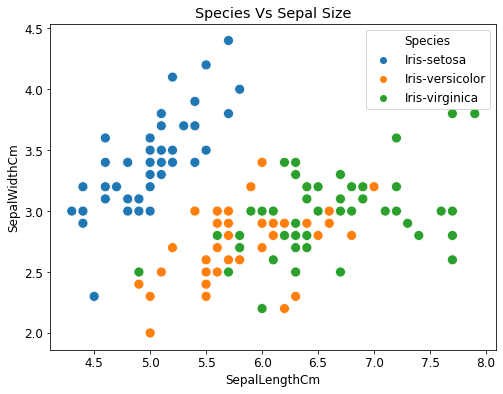

In [17]:
%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (8, 6)
matplotlib.rcParams["font.size"] = 12
sns.scatterplot(x=data_frame.SepalLengthCm, y=data_frame.SepalWidthCm, hue=data_frame.Species, s=100)
plt.title("Species Vs Sepal Size")
plt.legend()
plt.show()

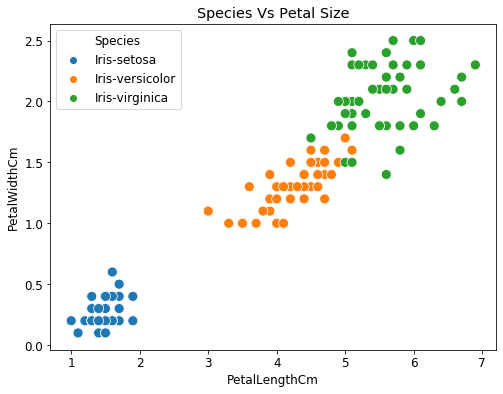

In [19]:
sns.scatterplot(x=data_frame.PetalLengthCm, y=data_frame.PetalWidthCm, hue=data_frame.Species, s=100)
plt.legend()
plt.title("Species Vs Petal Size")
plt.show()

#### Finding Number of Cluster for k-mean using Elbow curve

In [39]:
X = data_frame.drop(['Species'], axis=1).values
y = data_frame.Species.values

In [40]:
ssd = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=2020)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

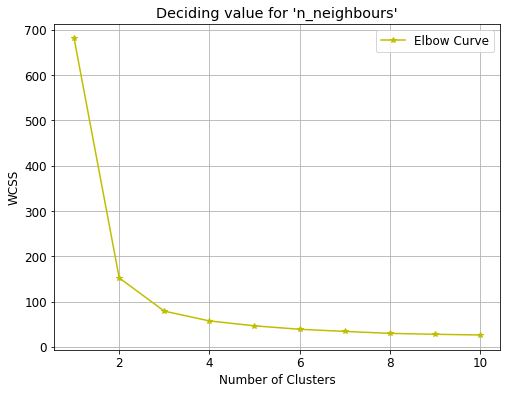

In [46]:
plt.plot(range(1, 11), ssd, 'y-*')
plt.grid()
plt.title("Deciding value for 'n_neighbours'")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend(['Elbow Curve'])
plt.show()

From above Graph we get number of clusters are 3.

#### Predicting Dataset By appling k-means

In [47]:
kmeans = KMeans(n_clusters=3, random_state=2020)
predictions = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
centers

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

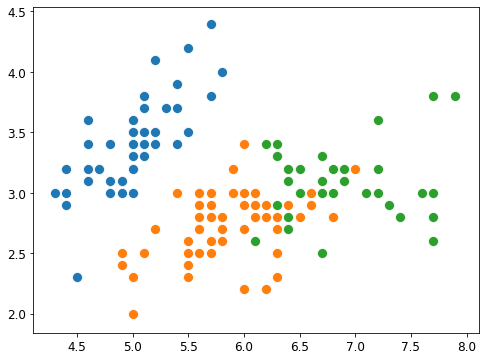

In [48]:
#Plotting data-points predicted by K-means algorithm .
sns.scatterplot(x = X[predictions == 0, 0], y = X[predictions == 0, 1], s = 100)
sns.scatterplot(x = X[predictions == 1, 0], y = X[predictions == 1, 1], s = 100)
sns.scatterplot(x = X[predictions == 2, 0], y = X[predictions == 2, 1], s = 100)
plt.show()

#### Task 2 Completed